In [74]:
import cv2
import glob
import pytesseract
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
pytesseract.pytesseract.tesseract_cmd = r"/usr/local/Cellar/tesseract/5.3.4_1/bin/tesseract"

In [76]:
x = glob.glob("cabBills/*.png")
x

['cabBills/2511.png',
 'cabBills/1781.png',
 'cabBills/2920.png',
 'cabBills/188.png',
 'cabBills/1622.png',
 'cabBills/1813.png',
 'cabBills/997.png',
 'cabBills/2739.png',
 'cabBills/1026.png',
 'cabBills/2923.png',
 'cabBills/2658.png',
 'cabBills/1184.png',
 'cabBills/2338.png',
 'cabBills/1584.png',
 'cabBills/1023.png',
 'cabBills/987.png',
 'cabBills/72.png',
 'cabBills/991.png',
 'cabBills/1544.png',
 'cabBills/2299.png',
 'cabBills/984.png',
 'cabBills/98.png',
 'cabBills/1182.png',
 'cabBills/465.png',
 'cabBills/1654.png',
 'cabBills/667.png',
 'cabBills/2177.png',
 'cabBills/2228.png',
 'cabBills/1655.png',
 'cabBills/2996.png',
 'cabBills/507.png',
 'cabBills/2439.png',
 'cabBills/2405.png',
 'cabBills/2945.png',
 'cabBills/660.png',
 'cabBills/1647.png',
 'cabBills/3093.png',
 'cabBills/1725.png',
 'cabBills/529.png',
 'cabBills/924.png',
 'cabBills/2985.png',
 'cabBills/2946.png',
 'cabBills/2601.png',
 'cabBills/2618.png',
 'cabBills/2022.png',
 'cabBills/1271.png',
 'c

In [77]:
imgName = x[1]
imgName

'cabBills/1781.png'

In [78]:
img = cv2.imread(imgName)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

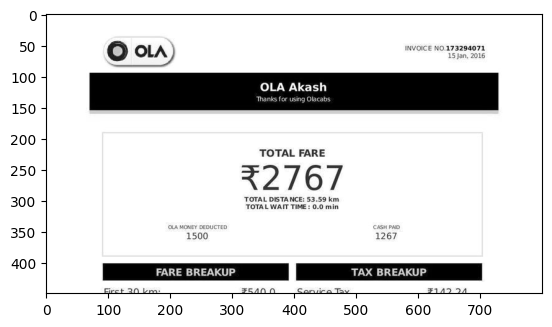

In [79]:
plt.imshow(img, cmap = "grey")

In [80]:
txtOut = pytesseract.image_to_string(img)
txtOut

'INVOICE No.173294071\n15 Jan, 2016\n\nLA Akash\n\nThanks for using Olacabs\n\nTOTAL FARE\n\n32767\n\n‘TOTAL DISTANCE: 53.59 km\nTOTAL WAIT TIME : 0.0 min\n\n1267\n\nFARE BREAKUP TAX BREAKUP\n\ninagaalcaue ec wan.  ebecemes Sea ca rca\n\n'